In [160]:
N = 4000; C = 2   # 0: neg, 1: neutral 2: pos
# N = 2000; C = 0   
# N = 3000; C = 1   

SEED_CHLS = [
    'Fp1', 'Fpz', 'Fp2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4',
    'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8',
    'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3',
    'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz',
    'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POz', 'PO4', 'PO6', 'PO8',
    'PO9', 'O1', 'Oz', 'O2', 'PO10']
SEED_SUBNUM = 15
SEED_LOCATION = [
    ['-', '-', '-', 'Fp1', 'Fpz', 'Fp2', '-', '-', '-'],
    ['-', '-', '-', 'AF3', '-', 'AF4', '-', '-', '-'],
    ['F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8'],
    ['FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8'],
    ['T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8'],
    ['TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8'],
    ['P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8'],
    ['-', 'PO7', 'PO5', 'PO3', 'POz', 'PO4', 'PO6', 'PO8', '-'],
    ['-', '-', 'PO9', 'O1', 'Oz', 'O2', 'PO10', '-', '-']]
# Rename the channels
# rename_dict = {'Fp1': 'FP1', 'Fp2': 'FP2', 'FPz' : 'FPZ',
#            'Fz' : 'FZ', 'FCz' : 'FCZ', 'Cz' : 'CZ', 
#            'CPz' : 'CPZ', 'Pz' : 'PZ', 'Oz' : 'OZ', 
#            'PO9' : 'CB1','PO10' : 'CB2',}
def load_dataset_info(dataset):
    if dataset == 'GAMEEMO': return GAMEEMO_SUBNUM, GAMEEMO_CHLS, GAMEEMO_LOCATION
    elif dataset == 'SEED': return SEED_SUBNUM, SEED_CHLS, SEED_LOCATION
    elif dataset == 'SEED_IV': return SEED_IV_SUBNUM, SEED_IV_CHLS, SEED_IV_LOCATION
    elif dataset == 'DEAP': return DEAP_SUBNUM, DEAP_CHLS, DEAP_LOCATION

def get_sfreq(dataset):
    if dataset == 'GAMEEMO':
        sfeq = 128; l_freq, h_freq = 0.16, 43
    elif dataset == 'SEED':
        sfeq = 200; #l_freq, h_freq = 0, 75; 
        l_freq, h_freq = 2, 50
    elif dataset == 'SEED_IV':
        sfeq = 200; #l_freq, h_freq = 1, 75;
        l_freq, h_freq = 2, 50
    elif dataset == 'DEAP':
        sfeq = 128; l_freq, h_freq = 4, 45
    return sfeq, l_freq, h_freq

In [145]:
%matplotlib inline

import os
from os.path import join, exists
from pathlib import Path
import numpy as np
import mne
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from PIL import Image

DATASET_NAME = 'SEED' #'GAMEEMO, SEED, SEED_IV, DEAP'
LABEL = '4'           # 'v', 'a' GAMEEMO/DEAP, '4' SEED, SEED_IV
MODEL_NAME = 'CCNN'   # CCNN, TSC, EEGNet, DGCNN
FEATURE = 'DE'     # 'DE, PSD, raw'

PROJECT = 'High'
THRESHOLDS = ['95']

if MODEL_NAME == 'CCNN': SHAPE = 'grid'
elif MODEL_NAME == 'TSC' or MODEL_NAME == 'EEGNet': SHAPE = 'expand'; FEATURE = 'raw'
elif MODEL_NAME == 'DGCNN': SHAPE = None
# if FEATURE == 'DE': SCALE = None
# elif FEATURE == 'PSD': SCALE = 'log'
# elif FEATURE == 'raw': SCALE = 'standard'
if LABEL == 'a':    train_name = 'arousal'
elif LABEL == 'v':  train_name = 'valence'
else:               train_name = 'emotion'
if MODEL_NAME == 'EEGNet' or MODEL_NAME == 'TSC': MODEL_FEATURE = MODEL_NAME
else: MODEL_FEATURE = '_'.join([MODEL_NAME, FEATURE])

SUB_NUM, CHLS, LOCATION = load_dataset_info(DATASET_NAME)

analysis_file = 'analysis'
analysis_path = Path(join(os.getcwd(), 'results', DATASET_NAME, MODEL_FEATURE, PROJECT, train_name, analysis_file))

if not exists(analysis_path): raise FileNotFoundError(f"File not found: {analysis_path}")
else: print(analysis_path)

/home/hyodol/HYODOL/OOD/results/SEED/CCNN_DE/High/emotion/analysis


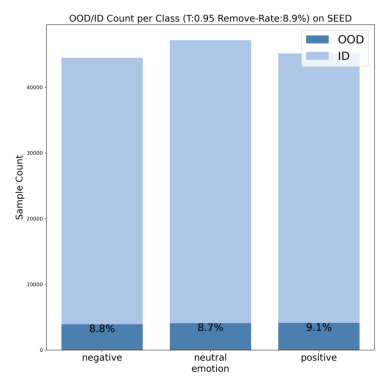

In [146]:
img = Image.open(join(analysis_path,f'ID_OOD_class{THRESHOLDS[0]}.png'))
plt.imshow(img); plt.axis('off'); plt.show()

In [147]:
# Load ID/OOD from .npz file
IND_npz = f'IND_{THRESHOLDS[0]}.npz'
OOD_npz = f'OOD_{THRESHOLDS[0]}.npz'

def load_data(dir, npz):
    data = np.load(join(dir, npz), allow_pickle=True)
    X, Y = data['X'], data['Y']
    labels, subids = Y[:, 0], Y[:, 1]
    print(X.shape, labels.shape, subids.shape)
    return X, labels, subids

# Load ID,OOD
X_ind, labels_ind, subids_ind = load_data(analysis_path, IND_npz)
X_ood, labels_ood, subids_ood = load_data(analysis_path, OOD_npz)

(124692, 4, 9, 9) (124692,) (124692,)
(12153, 4, 9, 9) (12153,) (12153,)


In [148]:
def reverse_grid(datas, channel, location):
    CHANNEL_LOCATION_DICT = format_channel_location_dict(channel, location)
    togrid = ToGrid(CHANNEL_LOCATION_DICT)
    return np.array([togrid.reverse(sample) for sample in datas])

def format_channel_location_dict(channel_list, location_list):
    location_list = np.array(location_list)
    output = {}
    for channel in channel_list:
        if len(np.argwhere(location_list == channel)):
            location = (np.argwhere(location_list == channel)[0]).tolist()
            output[channel] = location
    return output
    
class ToGrid:
    def __init__(self, channel_location_dict):
        self.channel_location_dict = channel_location_dict

        loc_x_list = []
        loc_y_list = []
        for _, (loc_y, loc_x) in channel_location_dict.items():
            loc_x_list.append(loc_x)
            loc_y_list.append(loc_y)
        self.width = max(loc_x_list) + 1
        self.height = max(loc_y_list) + 1

    def apply(self, eeg):
        # num_electrodes x timestep
        outputs = np.zeros([self.height, self.width, eeg.shape[-1]])
        # 9 x 9 x timestep
        for i, (loc_y, loc_x) in enumerate(self.channel_location_dict.values()):
            outputs[loc_y][loc_x] = eeg[i]

        outputs = outputs.transpose(2, 0, 1)
        # timestep x 9 x 9
        return outputs
        
    def reverse(self, eeg):
        # timestep x 9 x 9
        eeg = eeg.transpose(1, 2, 0)
        # 9 x 9 x timestep
        num_electrodes = len(self.channel_location_dict)
        outputs = np.zeros([num_electrodes, eeg.shape[2]])
        for i, (x, y) in enumerate(self.channel_location_dict.values()):
            outputs[i] = eeg[x][y]
        # num_electrodes x timestep
        return outputs
        
X_ind = reverse_grid(X_ind, CHLS, LOCATION)
X_ood = reverse_grid(X_ood, CHLS, LOCATION)

print(X_ind.shape, X_ood.shape)

(124692, 62, 4) (12153, 62, 4)


In [152]:
print(train_name)
label_class = np.unique(labels_ind)
label_class

emotion


array([0, 1, 2])

# Filter label C: negative, neutral, positive

In [153]:
label_names = ['negative', 'neutral', 'positive'] 
label_name = label_names[C]

X_ind_C = X_ind[labels_ind == C]
subids_ind_C = subids_ind[labels_ind == C]

X_ood_C = X_ood[labels_ood == C]
subids_ood_C = subids_ood[labels_ood == C]

label_name

'positive'

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


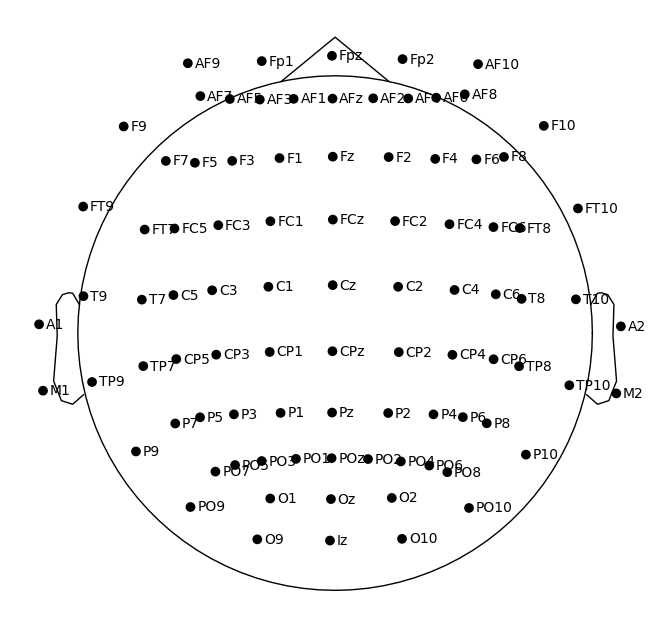

In [154]:
# Create Info
sfreq, l_freq, h_freq = get_sfreq(DATASET_NAME)
info = mne.create_info(ch_names=CHLS, sfreq=sfreq, ch_types="eeg")

# Assign the montage
montage = mne.channels.make_standard_montage('standard_1020')
info.set_montage(montage)
montage.plot(show_names=True);

In [155]:
# Create events based on subids 
events_ind = np.column_stack([np.arange(len(subids_ind_C)), np.zeros(len(subids_ind_C), dtype=int), subids_ind_C])
events_ind

array([[    0,     0,     1],
       [    1,     0,     1],
       [    2,     0,     1],
       ...,
       [41031,     0,    15],
       [41032,     0,    15],
       [41033,     0,    15]])

In [156]:
event_id_ind = {f'sub_{int(i)}': int(i) for i in np.unique(subids_ind_C)}
event_id_ind

{'sub_1': 1,
 'sub_2': 2,
 'sub_3': 3,
 'sub_4': 4,
 'sub_5': 5,
 'sub_6': 6,
 'sub_7': 7,
 'sub_8': 8,
 'sub_9': 9,
 'sub_10': 10,
 'sub_11': 11,
 'sub_12': 12,
 'sub_13': 13,
 'sub_14': 14,
 'sub_15': 15}

In [157]:
events_ood = np.column_stack([np.arange(len(subids_ood_C)), np.zeros(len(subids_ood_C), dtype=int), subids_ood_C])
event_id_ood = {f'sub_{int(i)}': int(i) for i in np.unique(subids_ood_C)}

In [161]:
# Create EpochsArray
epochs_ind = mne.EpochsArray(X_ind_C, info, events=events_ind, event_id=event_id_ind)
epochs_ood = mne.EpochsArray(X_ood_C, info, events=events_ood, event_id=event_id_ood)
print(epochs_ind)
print(epochs_ood)

Not setting metadata
41034 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4131 matching events found
No baseline correction applied
0 projection items activated
<EpochsArray |  41034 events (all good), 0 – 0.015 s, baseline off, ~77.7 MB, data loaded,
 'sub_1': 2307
 'sub_2': 2232
 'sub_3': 2978
 'sub_4': 1817
 'sub_5': 2992
 'sub_6': 2994
 'sub_7': 2977
 'sub_8': 2950
 'sub_9': 2972
 'sub_10': 2988
 and 5 more events ...>
<EpochsArray |  4131 events (all good), 0 – 0.015 s, baseline off, ~7.9 MB, data loaded,
 'sub_1': 704
 'sub_2': 779
 'sub_3': 33
 'sub_4': 1194
 'sub_5': 19
 'sub_6': 17
 'sub_7': 34
 'sub_8': 61
 'sub_9': 39
 'sub_10': 23
 and 5 more events ...>


# Sampling

In [162]:
def random_sample_epochs(epochs, num_samples):
    random_indices = np.random.choice(len(epochs), num_samples, replace=False)
    return epochs[random_indices]

random_epochs_ind = random_sample_epochs(epochs_ind, N)
random_epochs_ood = random_sample_epochs(epochs_ood, N)

print(random_epochs_ind)
print(random_epochs_ood)

print(random_epochs_ind.get_data().shape, random_epochs_ood.get_data().shape)

<EpochsArray |  4000 events (all good), 0 – 0.015 s, baseline off, ~7.7 MB, data loaded,
 'sub_1': 208
 'sub_2': 226
 'sub_3': 270
 'sub_4': 181
 'sub_5': 292
 'sub_6': 297
 'sub_7': 296
 'sub_8': 290
 'sub_9': 259
 'sub_10': 309
 and 5 more events ...>
<EpochsArray |  4000 events (all good), 0 – 0.015 s, baseline off, ~7.7 MB, data loaded,
 'sub_1': 689
 'sub_2': 756
 'sub_3': 33
 'sub_4': 1155
 'sub_5': 17
 'sub_6': 17
 'sub_7': 31
 'sub_8': 60
 'sub_9': 37
 'sub_10': 22
 and 5 more events ...>
(4000, 62, 4) (4000, 62, 4)


In [163]:
freq_bands = ['Theta', 'Alpha', 'Beta', 'Gamma']

def get_minmax(inds, oods):
    combined = np.concatenate([inds, oods], axis=0)
    return np.min(combined), np.max(combined)

def get_indood(epochs_ind, epochs_ood):    
    ind_band = {band: [] for band in freq_bands}
    ood_band = {band: [] for band in freq_bands}
    
    for i, band in enumerate(freq_bands):
        print(band)

        de_ind = epochs_ind.get_data()[:,:, i] #samples, channels, freq
        de_ood = epochs_ood.get_data()[:,:, i]
        
        # Average per epoch
        inds = np.mean(de_ind, axis=0)
        oods = np.mean(de_ood, axis=0)
                                                             
        # Normalize
        min_val, max_val = get_minmax(inds, oods)
        print(min_val, max_val)
        
        inds = (inds - min_val) / (max_val - min_val)
        oods = (oods - min_val) / (max_val - min_val)
               
        ind_band[band] = inds
        ood_band[band] = oods
        
    return ind_band, ood_band

band_ind, band_ood = get_indood(random_epochs_ind, random_epochs_ood)

Theta
1.3621108619454574 3.6087251889899834
Alpha
1.3120313072973366 3.592007503283574
Beta
1.517403229931963 3.8593242359084443
Gamma
1.370810604265431 3.865300967887161


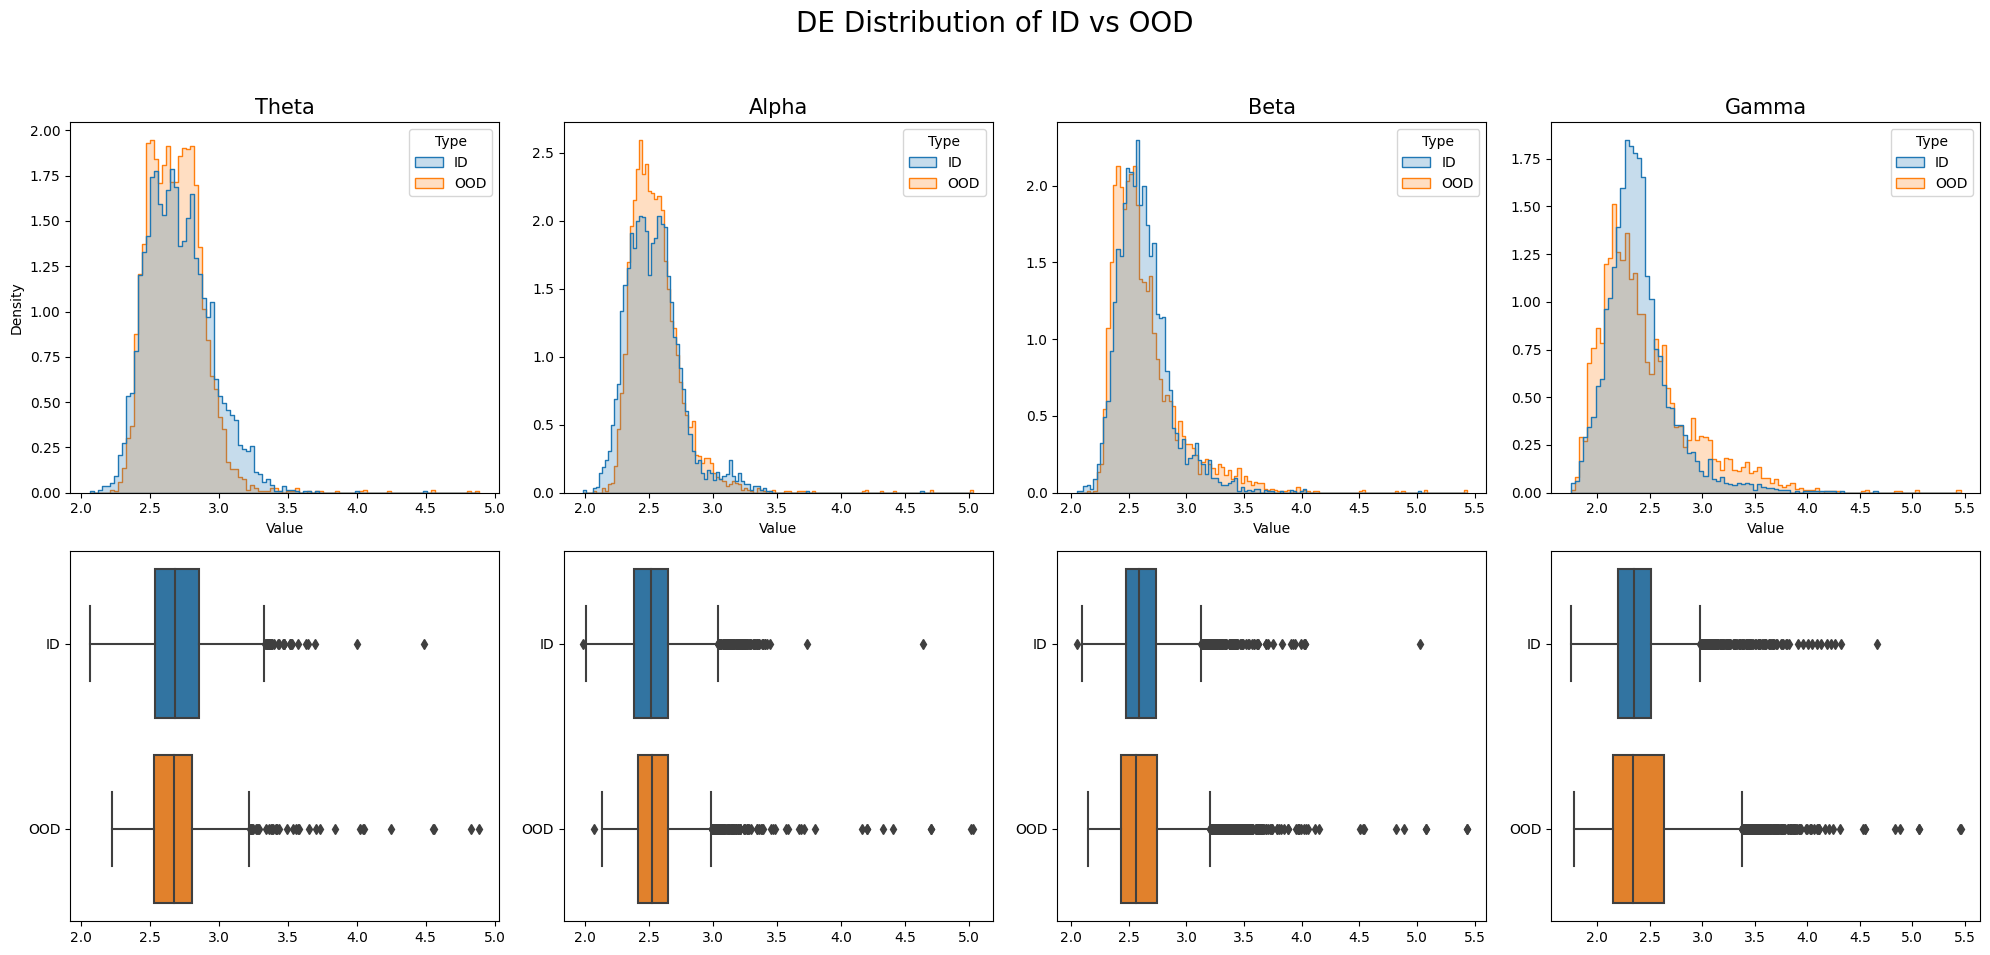

In [166]:
import pandas as pd
import seaborn as sns

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('DE Distribution of ID vs OOD', fontsize=20)

for freq in range(4):
    ind_mean = np.mean(random_epochs_ind.get_data()[:, :, freq], axis=1)
    ood_mean = np.mean(random_epochs_ood.get_data()[:, :, freq], axis=1)
    
    df = pd.DataFrame({
        'Value': np.concatenate([ind_mean, ood_mean]),
        'Type': ['ID'] * len(ind_mean) + ['OOD'] * len(ood_mean)})
    
    sns.histplot(data=df, x='Value', hue='Type', element='step', stat='density', common_norm=False, ax=axs[0, freq])
    # axs[0, freq].set_xlabel('')  # x축 레이블 삭제
    if freq != 0: axs[0, freq].set_ylabel('')  # y축 레이블 삭제
    
    sns.boxplot(data=df, y='Type', x='Value', orient='h', ax=axs[1, freq])
    axs[1, freq].set_xlabel('')  # x축 레이블 삭제
    axs[1, freq].set_ylabel('')  # y축 레이블 삭제
    
    axs[0, freq].set_title(f"{freq_bands[freq]}", fontsize=15)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(join(analysis_path, 'hist.png'), dpi=300)
plt.show()

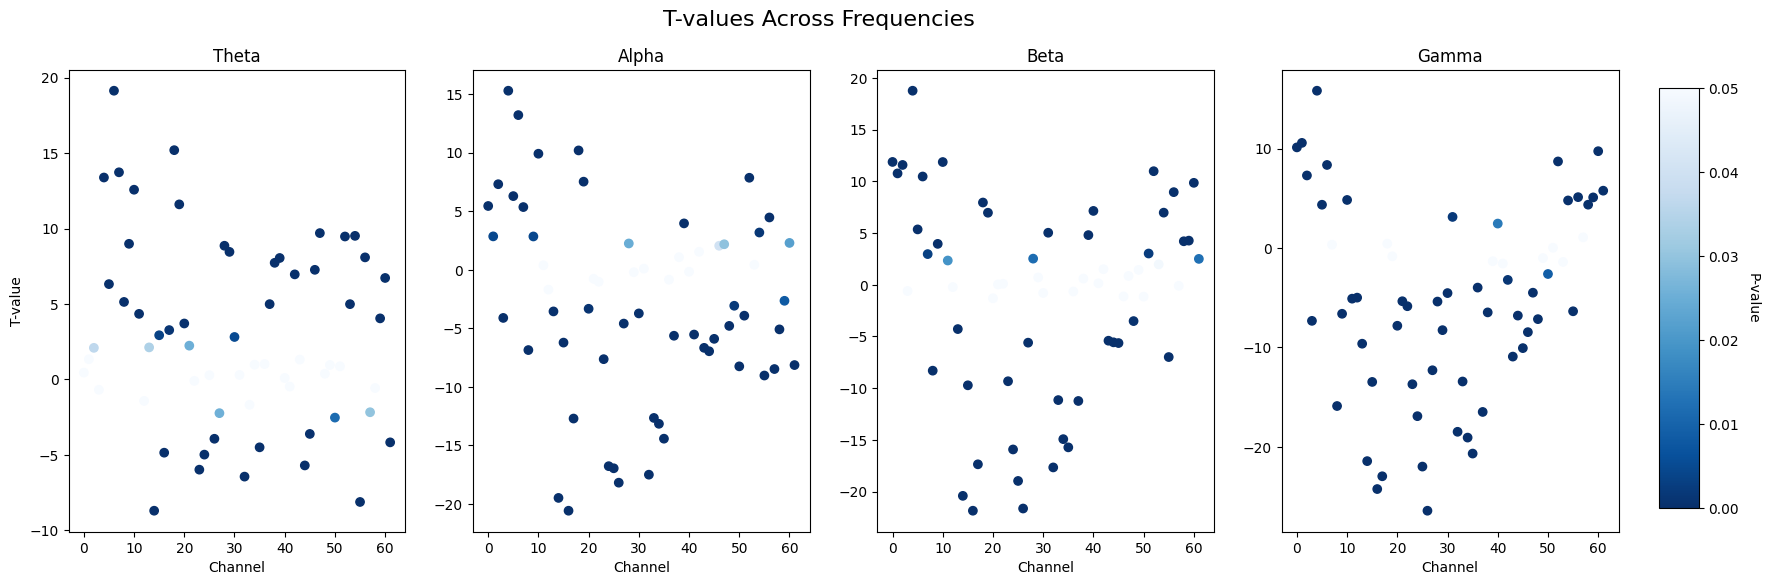

In [168]:
from scipy.stats import ttest_ind
from scipy import stats

n_channels = len(CHLS)
n_freqs = 4

t_values = np.zeros((n_channels, n_freqs))
p_values = np.zeros((n_channels, n_freqs))

# Welch's t-test 수행
for ch in range(n_channels):
    for i, band in enumerate(freq_bands):
        ind_data = random_epochs_ind.get_data()[:, ch, i]
        ood_data = random_epochs_ood.get_data()[:, ch, i]
        
        t_value, p_value = ttest_ind(ind_data, ood_data, equal_var=False)
        t_values[ch, i] = t_value
        p_values[ch, i] = p_value

fig, axs = plt.subplots(1, 4, figsize=(20, 6))
fig.suptitle('T-values Across Frequencies', fontsize=16)

for i, band in enumerate(freq_bands):
    ax = axs[i]
    sc = ax.scatter(range(n_channels), t_values[:, i], c=p_values[:, i], cmap='Blues_r', vmin=0, vmax=0.05)
    ax.set_title(f"{band}")
    
    ax.set_xlabel('Channel')
    if i == 0:
        ax.set_ylabel('T-value')
    
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = plt.colorbar(sc, cax=cbar_ax)
cbar.set_label('P-value', rotation=270, labelpad=15)

plt.show()

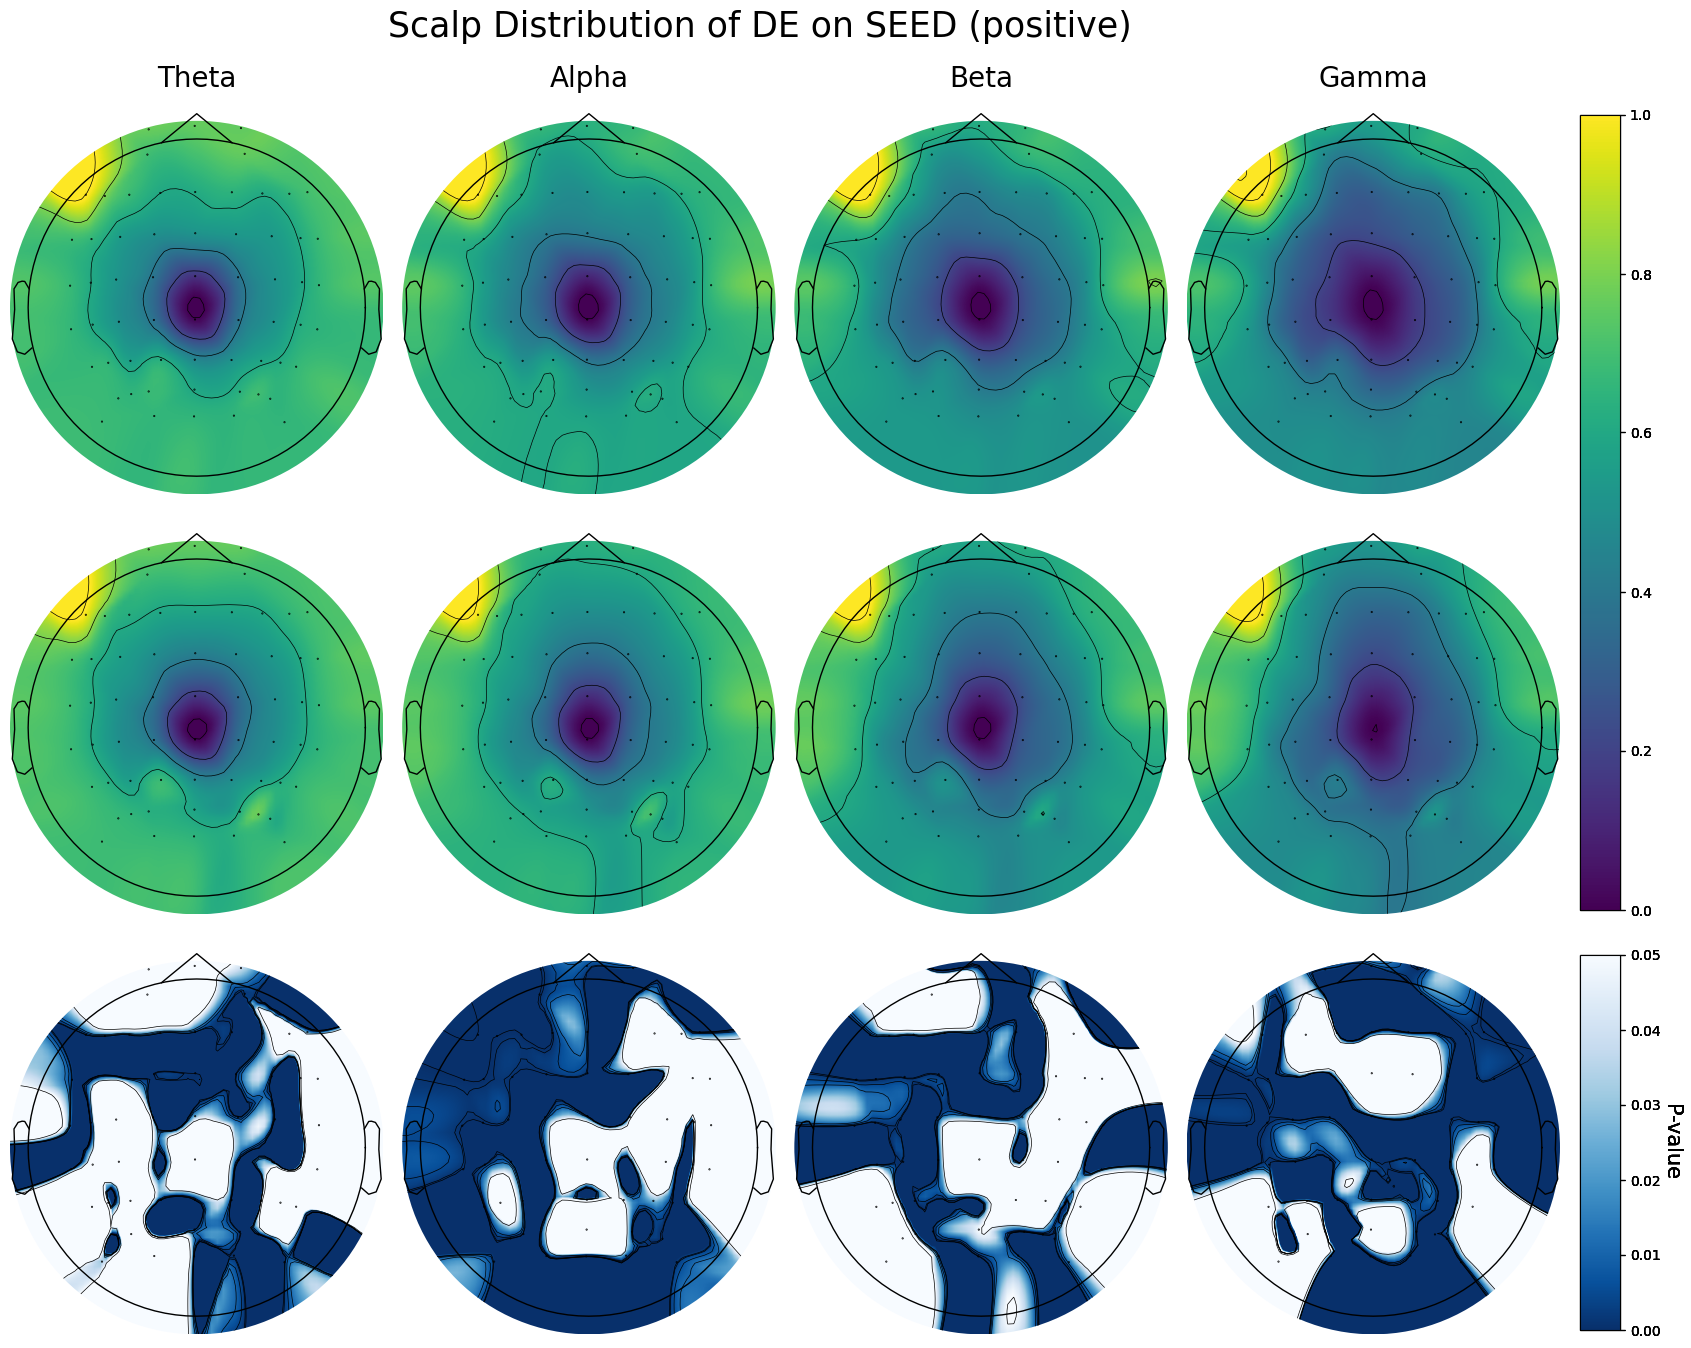

In [170]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle(f'Scalp Distribution of DE on {DATASET_NAME} ({label_name})', fontsize=25, y= 1)

for col, (band, de) in enumerate(band_ind.items()):
    im, _ = mne.viz.plot_topomap(de, info, axes=axs[0, col], cmap='viridis', show=False, vlim=(0,1)) 
    axs[0, col].set_title(f"{band}", fontsize=20)
    
for col, (band, de) in enumerate(band_ood.items()):
    im, _ = mne.viz.plot_topomap(de, info, axes=axs[1, col], cmap='viridis', show=False, vlim=(0,1)) 
    # axs[1, col].set_title(f"{band}")
    
    cbar_ax = fig.add_axes([0.91, 0.4, 0.02, 0.53])
    plt.colorbar(im, cax=cbar_ax, format="%.1f")

for i, band in enumerate(freq_bands):
    im, _ = mne.viz.plot_topomap(p_values[:, i], info, axes=axs[2, i], cmap='Blues_r', vlim=(0, 0.05), contours=[0, 0.001, 0.005, 0.01, 0.05], show=False)
    # axs[2, i].set_title(f"", fontsize=20)

    cbar_ax = fig.add_axes([0.91, 0.12, 0.02, 0.25])
    cbar = plt.colorbar(im, cax=cbar_ax)
    cbar.set_label('P-value', rotation=270, labelpad=15, fontsize=15)
    
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig(join(analysis_path, f'{label_name}_t.png'), bbox_inches='tight', dpi=300)
plt.show()

PSD

In [ ]:
def get_minmax(inds, oods):
    combined = np.concatenate([inds, oods], axis=0)
    return np.min(combined), np.max(combined)

def get_indood(epochs_ind, epochs_ood):
    
    freq_bands = {'Theta': [4, 8], 'Alpha': [8, 14], 'Beta': [14, 30], 'Gamma': [30, 49]}
    
    ind_band = {band: [] for band in freq_bands.keys()}
    ood_band = {band: [] for band in freq_bands.keys()}
    
    for band, f_range in freq_bands.items():
        print(band)
        # Compute PSD
        spectrum_ind = epochs_ind.compute_psd(fmin=f_range[0], fmax=f_range[1], verbose=False).get_data()
        spectrum_ood = epochs_ood.compute_psd(fmin=f_range[0], fmax=f_range[1], verbose=False).get_data()
    
        spectrum_ind = np.mean(spectrum_ind, axis=2)
        spectrum_ood = np.mean(spectrum_ood, axis=2)
        
        # Average per epoch
        inds = np.mean(spectrum_ind, axis=0)
        oods = np.mean(spectrum_ood, axis=0)
                                                             
        # Normalize
        min_val, max_val = get_minmax(inds, oods)
        inds = (inds - min_val) / (max_val - min_val)
        oods = (oods - min_val) / (max_val - min_val)
               
        ind_band[band] = inds
        ood_band[band] = oods
        
    return ind_band, ood_band

band_ind, band_ood = get_indood(random_epochs_ind, random_epochs_ood)

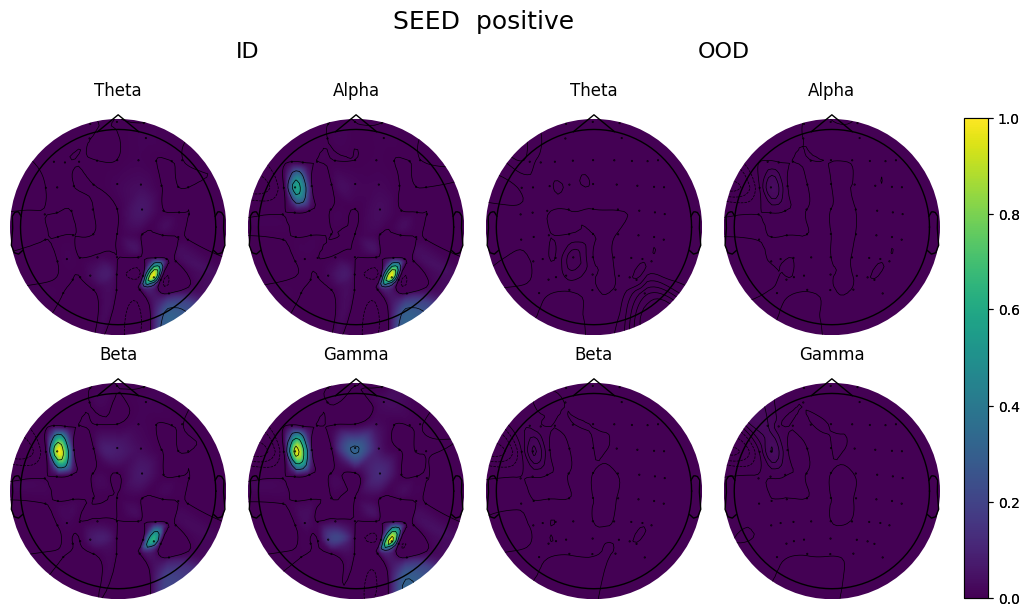

In [49]:
def plot_psd_topomap(band_psd, label, fig, axs):
    pos = [(0, 0), (0, 1), (1, 0), (1, 1)]
    
    for p, (band, psd) in zip(pos, band_psd.items()):
        im, _ = mne.viz.plot_topomap(psd, epochs_ind.info, axes=axs[p[0], p[1]], cmap='viridis', show=False, vlim=(0,1))
        axs[p[0], p[1]].set_title(f"{band}")

    cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.8])
    plt.colorbar(im, cax=cbar_ax, format="%.1f")
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

plot_psd_topomap(band_ind, 'ID', fig, axs[:, :2])
axs[0, 0].text(1.1, 1.2, 'ID', fontsize=16, ha='center', transform=axs[0, 0].transAxes)

plot_psd_topomap(band_ood, 'OOD', fig, axs[:, 2:])
axs[0, 2].text(1.1, 1.2, 'OOD', fontsize=16, ha='center', transform=axs[0, 2].transAxes)

plt.suptitle(f'{DATASET_NAME}  {label_name}', ha='center', fontsize=18, x=0.52, y=1.1)

plt.savefig(join(analysis_path, f'{label_name}_analysis.png'), bbox_inches='tight', dpi=300)
plt.show()

---

# 다른 방법
## log (PSD)
## normalize

In [130]:
from sklearn.preprocessing import normalize

def get_minmax(inds, oods):
    combined = np.concatenate([inds, oods], axis=0)
    return np.min(combined), np.max(combined)
    
def get_indood(epochs_ind, epochs_ood):
    freq_bands = {'Theta': [4, 8], 'Alpha': [8, 14], 'Beta': [14, 30], 'Gamma': [30, 49]}
    
    ind_band = {band: [] for band in freq_bands.keys()}
    ood_band = {band: [] for band in freq_bands.keys()}
    
    for band, f_range in freq_bands.items():
        print(band)
        # Compute PSD
        spectrum_ind = epochs_ind.compute_psd(fmin=f_range[0], fmax=f_range[1], verbose=False).get_data()
        spectrum_ood = epochs_ood.compute_psd(fmin=f_range[0], fmax=f_range[1], verbose=False).get_data()

        spectrum_ind = np.mean(spectrum_ind, axis=2)
        spectrum_ood = np.mean(spectrum_ood, axis=2)
        
        # # Average per epoch
        # inds = np.mean(spectrum_ind, axis=0)
        # oods = np.mean(spectrum_ood, axis=0)
        
        # Average per epoch with log transform
        inds = np.mean(np.log1p(spectrum_ind), axis=0)
        oods = np.mean(np.log1p(spectrum_ood), axis=0)
                
        # # Normalize
        # min_val, max_val = get_minmax(inds, oods)
        # inds = (inds - min_val) / (max_val - min_val)
        # oods = (oods - min_val) / (max_val - min_val)
        
        concated = np.concatenate([inds, oods], axis=0)
        normalized= normalize(concated.reshape(1, -1), norm='l2').flatten()

        ind_band[band] = normalized[:62]
        ood_band[band] = normalized[62:]
        
    return ind_band, ood_band

band_ind, band_ood = get_indood(random_epochs_ind, random_epochs_ood)

Theta
Alpha
Beta
Gamma


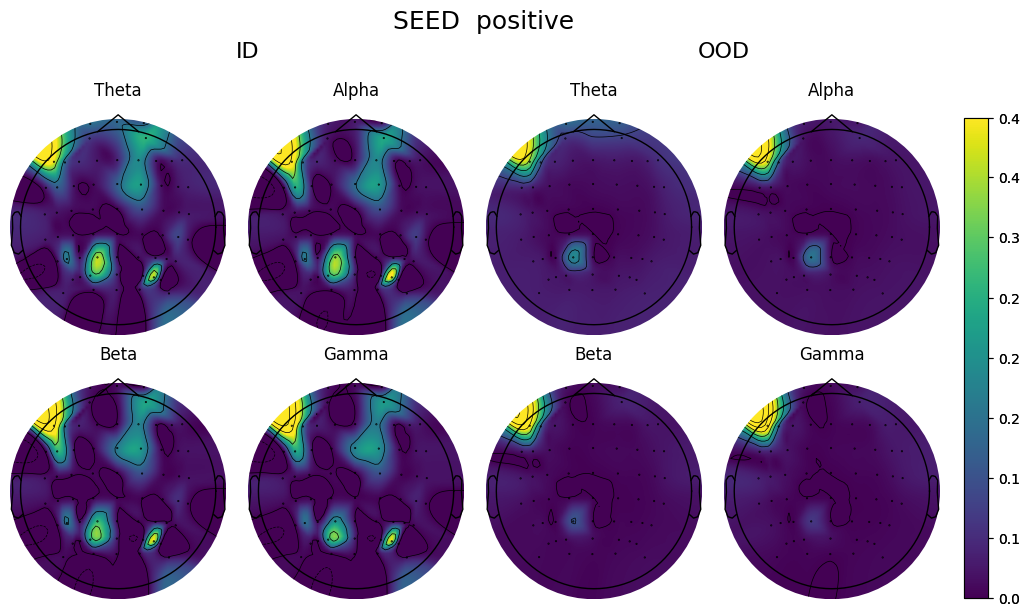

In [132]:
def plot_psd_topomap(band_psd, label, fig, axs):
    pos = [(0, 0), (0, 1), (1, 0), (1, 1)]
    
    for p, (band, psd) in zip(pos, band_psd.items()):
        im, _ = mne.viz.plot_topomap(psd, epochs_ind.info, axes=axs[p[0], p[1]], cmap='viridis', show=False, vlim=(0,0.4))
        axs[p[0], p[1]].set_title(f"{band}")

    cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.8])
    plt.colorbar(im, cax=cbar_ax, format="%.1f")
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

plot_psd_topomap(band_ind, 'ID', fig, axs[:, :2])
axs[0, 0].text(1.1, 1.2, 'ID', fontsize=16, ha='center', transform=axs[0, 0].transAxes)

plot_psd_topomap(band_ood, 'OOD', fig, axs[:, 2:])
axs[0, 2].text(1.1, 1.2, 'OOD', fontsize=16, ha='center', transform=axs[0, 2].transAxes)

plt.suptitle(f'{DATASET_NAME}  {label_name}', ha='center', fontsize=18, x=0.52, y=1.1)

plt.savefig(join(analysis_path, f'{label_name}_log_analysis.png'), bbox_inches='tight', dpi=300)
plt.show()

In [17]:
mne.__version__

'1.4.2'